In [39]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import re


In [5]:
df = pd.read_csv('./datasets/lyrics-data.csv')
df.head()

,ALink,SName,SLink,Lyric,language
0,/ivete-sangalo/,Arerê,/ivete-sangalo/arere.html,"Tudo o que eu quero nessa vida,\nToda vida, é\...",pt
1,/ivete-sangalo/,Se Eu Não Te Amasse Tanto Assim,/ivete-sangalo/se-eu-nao-te-amasse-tanto-assim...,Meu coração\nSem direção\nVoando só por voar\n...,pt
2,/ivete-sangalo/,Céu da Boca,/ivete-sangalo/chupa-toda.html,É de babaixá!\nÉ de balacubaca!\nÉ de babaixá!...,pt
3,/ivete-sangalo/,Quando A Chuva Passar,/ivete-sangalo/quando-a-chuva-passar.html,Quando a chuva passar\n\nPra quê falar\nSe voc...,pt
4,/ivete-sangalo/,Sorte Grande,/ivete-sangalo/sorte-grande.html,A minha sorte grande foi você cair do céu\nMin...,pt


In [11]:
filtered_df = df[df['language'] == 'en']
lyrics_df = filtered_df["Lyric"]

In [13]:
lyrics_df.head()
len(lyrics_df)

191814

In [17]:
vectorizer = CountVectorizer(max_features=5000, stop_words='english', binary=True)
x = vectorizer.fit_transform(lyrics_df)
x = np.sum(x, axis=0)

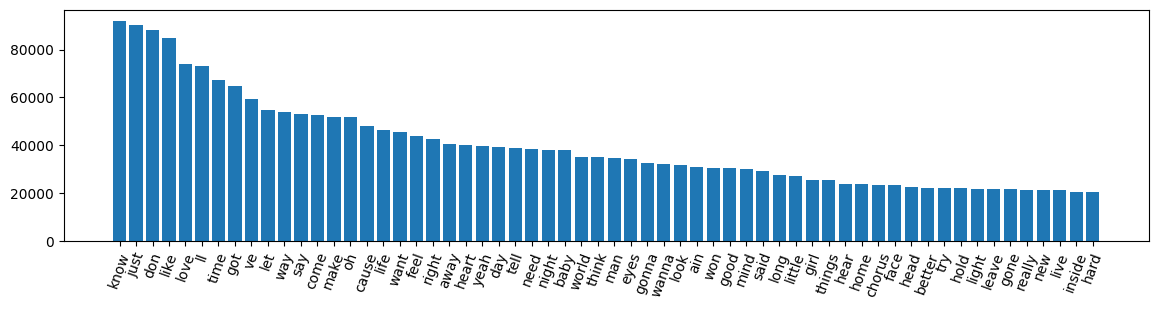

In [25]:
tuplas = [ (x[0,vectorizer.vocabulary_[i]], i) for i in vectorizer.vocabulary_.keys() ]
tuplas_ordenadas = sorted(tuplas, reverse=True) # reverse=True pede uma ordenação em ordem decrescente
palavras = [ t[1] for t in tuplas_ordenadas ]
contagens = [ t[0] for t in tuplas_ordenadas ]

n_palavras = 60
eixo_x = np.arange(n_palavras)
plt.figure(figsize=(14,3))
plt.bar(eixo_x[0:n_palavras], contagens[0:n_palavras])
plt.xticks(eixo_x[0:n_palavras], palavras[0:n_palavras], rotation=70)
plt.show()

In [27]:
df_artistas = pd.read_csv('./datasets/artists-data.csv')
df_artistas.head()

,Artist,Genres,Songs,Popularity,Link
0,Ivete Sangalo,Pop; Axé; Romântico,313.0,4.4,/ivete-sangalo/
1,Chiclete com Banana,Axé,268.0,3.8,/chiclete-com-banana/
2,Banda Eva,Axé; Romântico; Reggae,215.0,2.3,/banda-eva/
3,É O Tchan,Axé,129.0,1.6,/e-o-tchan/
4,Claudia Leitte,Pop; Axé; Romântico,167.0,1.5,/claudia-leitte/


In [61]:
dictionario ={}
for index, line in df_artistas.iterrows():
    try:
        artist = line["Artist"]
        # genres = len(line["Genres"].split(";"))
        genres = line["Genres"].split(";")
        dictionario[artist]=genres
    except:
        continue        



Error processing row 118: 'float' object has no attribute 'split'
Error processing row 587: 'float' object has no attribute 'split'
Error processing row 1987: 'float' object has no attribute 'split'
Error processing row 2014: 'float' object has no attribute 'split'
Error processing row 2368: 'float' object has no attribute 'split'


ValueError: 1 columns passed, passed data had 4 columns

In [114]:
dictionario = {}
for index, row in df_artistas.iterrows():
    try:
        artist = row["Artist"]
        genres = [row["Genres"].split(";")]
        dictionario[artist] = genres
    except Exception as e:
        print(f"Error processing row {index}: {e}")
        

# transform dictionary values to lists
dictionario = {k: [v] if not isinstance(v, list) else v for k, v in dictionario.items()}

genre_df = pd.DataFrame.from_dict(dictionario, orient='index', columns=['genres'])
genre_df.index.name = 'artists'
genre_df = genre_df.reset_index()
genre_df.head()


Error processing row 118: 'float' object has no attribute 'split'
Error processing row 587: 'float' object has no attribute 'split'
Error processing row 1987: 'float' object has no attribute 'split'
Error processing row 2014: 'float' object has no attribute 'split'
Error processing row 2368: 'float' object has no attribute 'split'


,artists,genres
0,Ivete Sangalo,"[Pop, Axé, Romântico]"
1,Chiclete com Banana,[Axé]
2,Banda Eva,"[Axé, Romântico, Reggae]"
3,É O Tchan,[Axé]
4,Claudia Leitte,"[Pop, Axé, Romântico]"


In [115]:
dictionario

{'Ivete Sangalo': [['Pop', ' Axé', ' Romântico']],
 'Chiclete com Banana': [['Axé']],
 'Banda Eva': [['Axé', ' Romântico', ' Reggae']],
 'É O Tchan': [['Axé']],
 'Claudia Leitte': [['Pop', ' Axé', ' Romântico']],
 'Harmonia do Samba': [['Axé', ' Samba', ' Pagode']],
 'Ara Ketu': [['Axé', ' Pop']],
 'Daniela Mercury': [['MPB', ' Axé']],
 'Olodum': [['Axé']],
 'Netinho': [['Axé']],
 'Asa de Águia': [['Axé', ' Forró', ' Romântico']],
 'Cheiro de Amor': [['Axé', ' Romântico', ' Chillout']],
 'Timbalada': [['Axé']],
 'Carlinhos Brown': [['Axé']],
 'Tomate': [['Romântico', ' Axé', ' Reggae']],
 'Jammil e Uma Noites': [['Axé', ' Romântico', ' Trilha Sonora']],
 'Luiz Caldas': [['Axé']],
 'Margareth Menezes': [['Axé', ' Samba', ' MPB']],
 'Jauperi': [['Axé']],
 'Babado Novo': [['Axé', ' Pop', ' Romântico']],
 'Parangolé': [['Axé', ' Pagode', ' Samba']],
 'Psirico': [['Axé', ' Pagode', ' Funk']],
 'Banda Grafith': [['Axé']],
 'Tchakabum': [['Axé']],
 'Bamda Mel': [['Axé']],
 'Black Style': [['P

In [116]:

# define a function to transform the column
def transform_name(name):
    try:
        new_name = re.sub(r'[-/]', ' ', name)  # remove forward slash and hyphen
        new_name = new_name.title().strip()  # capitalize first letter of each word
    except:
        new_name = ''
    return new_name

# apply the function to the 'name' column using the 'apply()' function
df['ALink'] = df['ALink'].apply(transform_name)

print(df.head())


           ALink                            SName  \
0  Ivete Sangalo                            Arerê   
1  Ivete Sangalo  Se Eu Não Te Amasse Tanto Assim   
2  Ivete Sangalo                      Céu da Boca   
3  Ivete Sangalo            Quando A Chuva Passar   
4  Ivete Sangalo                     Sorte Grande   

                                               SLink  \
0                          /ivete-sangalo/arere.html   
1  /ivete-sangalo/se-eu-nao-te-amasse-tanto-assim...   
2                     /ivete-sangalo/chupa-toda.html   
3          /ivete-sangalo/quando-a-chuva-passar.html   
4                   /ivete-sangalo/sorte-grande.html   

                                               Lyric language  
0  Tudo o que eu quero nessa vida,\nToda vida, é\...       pt  
1  Meu coração\nSem direção\nVoando só por voar\n...       pt  
2  É de babaixá!\nÉ de balacubaca!\nÉ de babaixá!...       pt  
3  Quando a chuva passar\n\nPra quê falar\nSe voc...       pt  
4  A minha sorte grande 

In [120]:
merged_df = pd.merge(df, genre_df, left_on='ALink', right_on='artists', how='outer')
merged_df.head()

,ALink,SName,SLink,Lyric,language,artists,genres
0,Ivete Sangalo,Arerê,/ivete-sangalo/arere.html,"Tudo o que eu quero nessa vida,\nToda vida, é\...",pt,Ivete Sangalo,"[Pop, Axé, Romântico]"
1,Ivete Sangalo,Se Eu Não Te Amasse Tanto Assim,/ivete-sangalo/se-eu-nao-te-amasse-tanto-assim...,Meu coração\nSem direção\nVoando só por voar\n...,pt,Ivete Sangalo,"[Pop, Axé, Romântico]"
2,Ivete Sangalo,Céu da Boca,/ivete-sangalo/chupa-toda.html,É de babaixá!\nÉ de balacubaca!\nÉ de babaixá!...,pt,Ivete Sangalo,"[Pop, Axé, Romântico]"
3,Ivete Sangalo,Quando A Chuva Passar,/ivete-sangalo/quando-a-chuva-passar.html,Quando a chuva passar\n\nPra quê falar\nSe voc...,pt,Ivete Sangalo,"[Pop, Axé, Romântico]"
4,Ivete Sangalo,Sorte Grande,/ivete-sangalo/sorte-grande.html,A minha sorte grande foi você cair do céu\nMin...,pt,Ivete Sangalo,"[Pop, Axé, Romântico]"


In [125]:
type(merged_df['genres'][0])

list

In [133]:
# create a list of genres to filter for
genres_to_filter = 'Axé'
filtered_by_gender_df = merged_df[merged_df['genres'].apply(lambda x: genres_to_filter in x)]

# filter the DataFrame based on the genres in the list
# filtered_df = merged_df[merged_df['genres'].isin(genres_to_filter)]
filtered_by_gender_df.head()

,ALink,SName,SLink,Lyric,language,artists,genres
313,Banda Eva,Eva,/banda-eva/eva.html,"Meu amor, olha só hoje o sol não apareceu\nÉ o...",pt,Banda Eva,"[Axé, Romântico, Reggae]"
314,Banda Eva,Anjo,/banda-eva/anjo.html,"Anjo\n\nAcredita em anjo?\nPois é, sou o seu\n...",pt,Banda Eva,"[Axé, Romântico, Reggae]"
315,Banda Eva,Só Eu E Você,/banda-eva/so-eu-e-voce.html,Aconteceu\nEm meio àquele mar de gente eu vi\n...,pt,Banda Eva,"[Axé, Romântico, Reggae]"
316,Banda Eva,We Are Carnaval,/banda-eva/we-are-carnaval-2.html,"Ah, que bom você chegou\nBem-vindo a Salvador\...",pt,Banda Eva,"[Axé, Romântico, Reggae]"
317,Banda Eva,Tão Sonhada,/banda-eva/tao-sonhada.html,"Arrumei a casa, preparei o coração\nEsperando ...",pt,Banda Eva,"[Axé, Romântico, Reggae]"
